 ## IPL 2020 Performance Competition

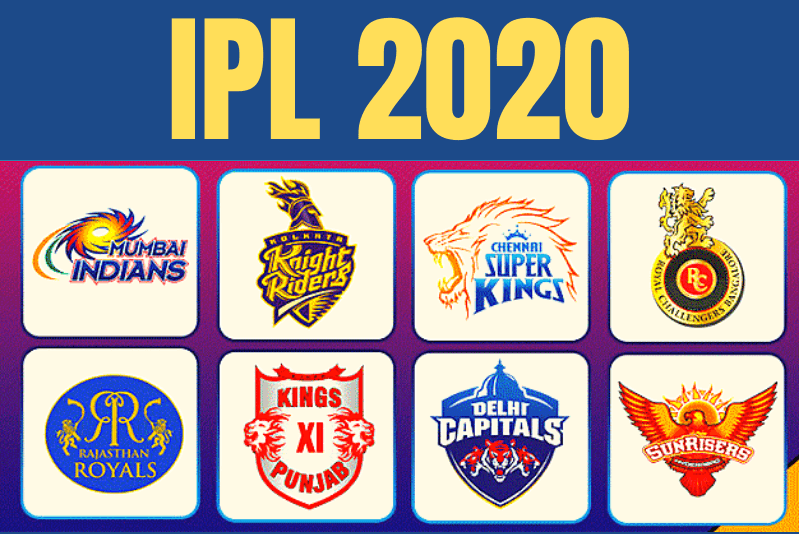]

## Datasets loading.... 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2020-player-performance/IPL 2020 Squads.csv
/kaggle/input/ipl-2020-player-performance/sample_submission.csv
/kaggle/input/ipl-2020-player-performance/Matches IPL 2020.csv
/kaggle/input/ipl-2020-player-performance/Matches IPL 2008-2019.csv
/kaggle/input/ipl-2020-player-performance/Training.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/ipl-2020-player-performance/Training.csv')
submission = pd.read_csv('/kaggle/input/ipl-2020-player-performance/sample_submission.csv')
matches_2020 =pd.read_csv('/kaggle/input/ipl-2020-player-performance/Matches IPL 2020.csv')

pre_matches= pd.read_csv('/kaggle/input/ipl-2020-player-performance/Matches IPL 2008-2019.csv')
squads = pd.read_csv('/kaggle/input/ipl-2020-player-performance/IPL 2020 Squads.csv',encoding= 'unicode_escape')

## creating new features 

In [3]:
train_df['player'] = train_df['Id']
train_df['number'] =  train_df['Id']
for i in range(0, len( train_df)):
    train_df['player'][i] =  train_df['Id'][i].split("_")[-1]
    train_df['number'][i] = int( train_df['Id'][i].split('_')[:1][0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [4]:
submission['player'] = submission['Id']
submission['match_number'] =  submission['Id']
for i in range(0, len( submission)):
    submission['player'][i] =  submission['Id'][i].split("_")[-1]
    submission['match_number'][i] = int( submission['Id'][i].split('_')[:1][0])
    submission['season'] = 2020

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
train_df.head()

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points,player,number
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25,Bipul Sharma,1
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44,DJ Hooda,1
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38,KM Jadhav,1
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29,Mandeep Singh,1
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86,Yuvraj Singh,1


## creating new dataframe

In [6]:

# creating new data frame using train_data set

df = pd.DataFrame()

df['Id']    = train_df['Id']
df['player'] = train_df['player']

df['match_number'] = train_df['number']
df['total_score'] = train_df['Total Points']


In [7]:
# creating new data Frame


pm = pd.DataFrame()
pm['match_number']= pre_matches['match_id']
pm['team1'] = pre_matches['team1']
pm['team2']= pre_matches['team2']
pm.team1.unique()


array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [8]:
t1 = { 'Kolkata Knight Riders':'KKR','Chennai Super Kings':'CSK','Rajasthan Royals':'RR','Mumbai Indians':'MI','Deccan Chargers':'SRH','Kings XI Punjab':'KXIP','Royal Challengers Bangalore':'RCB','Delhi Daredevils':'DC','Sunrisers Hyderabad':'SRH','Delhi Capitals':'DC','Rising Pune Supergiants':'RPS','Gujarat Lions':'GL','Rising Pune Supergiant':'RPS','Pune Warriors':'RPS','Kochi Tuskers Kerala':'KTK'}
        

In [9]:
# mapping new team names in short form

pm.team1=pm['team1'].replace(t1,regex=True)
pm.team2 = pm['team2'].map(t1)


In [10]:
shedule = matches_2020.drop(['city','venue','date','umpire1','umpire2','umpire3'],axis=1)

In [11]:
# list of players playing in 2020 ipl matches

player2 = submission.player.unique()

player2 = player2.tolist()
len(player2)

158

In [12]:
# check the list of players in 2020 ipl

player3 = squads['Player_name'].unique()
len(player3)

126

## setting up season 

In [13]:
season =[]

for k in df.match_number:
         
    for i in range(0,len(pre_matches.match_id)):
        
        if k==pre_matches.match_id[i]:
            season.append(pre_matches.season[i])
df['season'] = season
            


## setting up the team for player 

In [14]:
# loop to get team1 and team2 list in the order of matches

tmp1 =[]
tmp2 =[]
for k in df.match_number:
    for i in range(0,len(pm.match_number)):
        
        if k==pm.match_number[i]:
            tmp1.append(pm.team1[i])
            tmp2.append(pm.team2[i])
        
df['team1'] = tmp1
df['team2'] = tmp2        

In [15]:
len(pm)

756

In [16]:
# loop to get team1 and team2 for testing dataset


tm1 =[]
tm2 =[]
for k in submission.match_number:
    for i in range(0,len(shedule.match_id)):
        
        if k==shedule.match_id[i]:
            tm1.append(shedule.team1[i])
            tm2.append(shedule.team2[i])
        
submission['team1'] = tm1
submission['team2'] = tm2       
    

In [17]:
# creating team function
def team(df):
    team = []
    for i in range(0,len(df)):
        
        d =df[(df['player']==df['player'][i]) & (df['season']==df['season'][i])]
        l1 = d.team1.tolist() + d.team2.tolist()
        l2 = max(set(l1), key = l1.count)
        team.append(l2)
    
    df['team'] = team
  
 # creating invidual team for every player
team(df)
team(submission)


## insights

In [18]:
train_df.head()

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points,player,number
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25,Bipul Sharma,1
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44,DJ Hooda,1
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38,KM Jadhav,1
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29,Mandeep Singh,1
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86,Yuvraj Singh,1


<AxesSubplot:xlabel='Bowling_Points', ylabel='Batting_Points'>

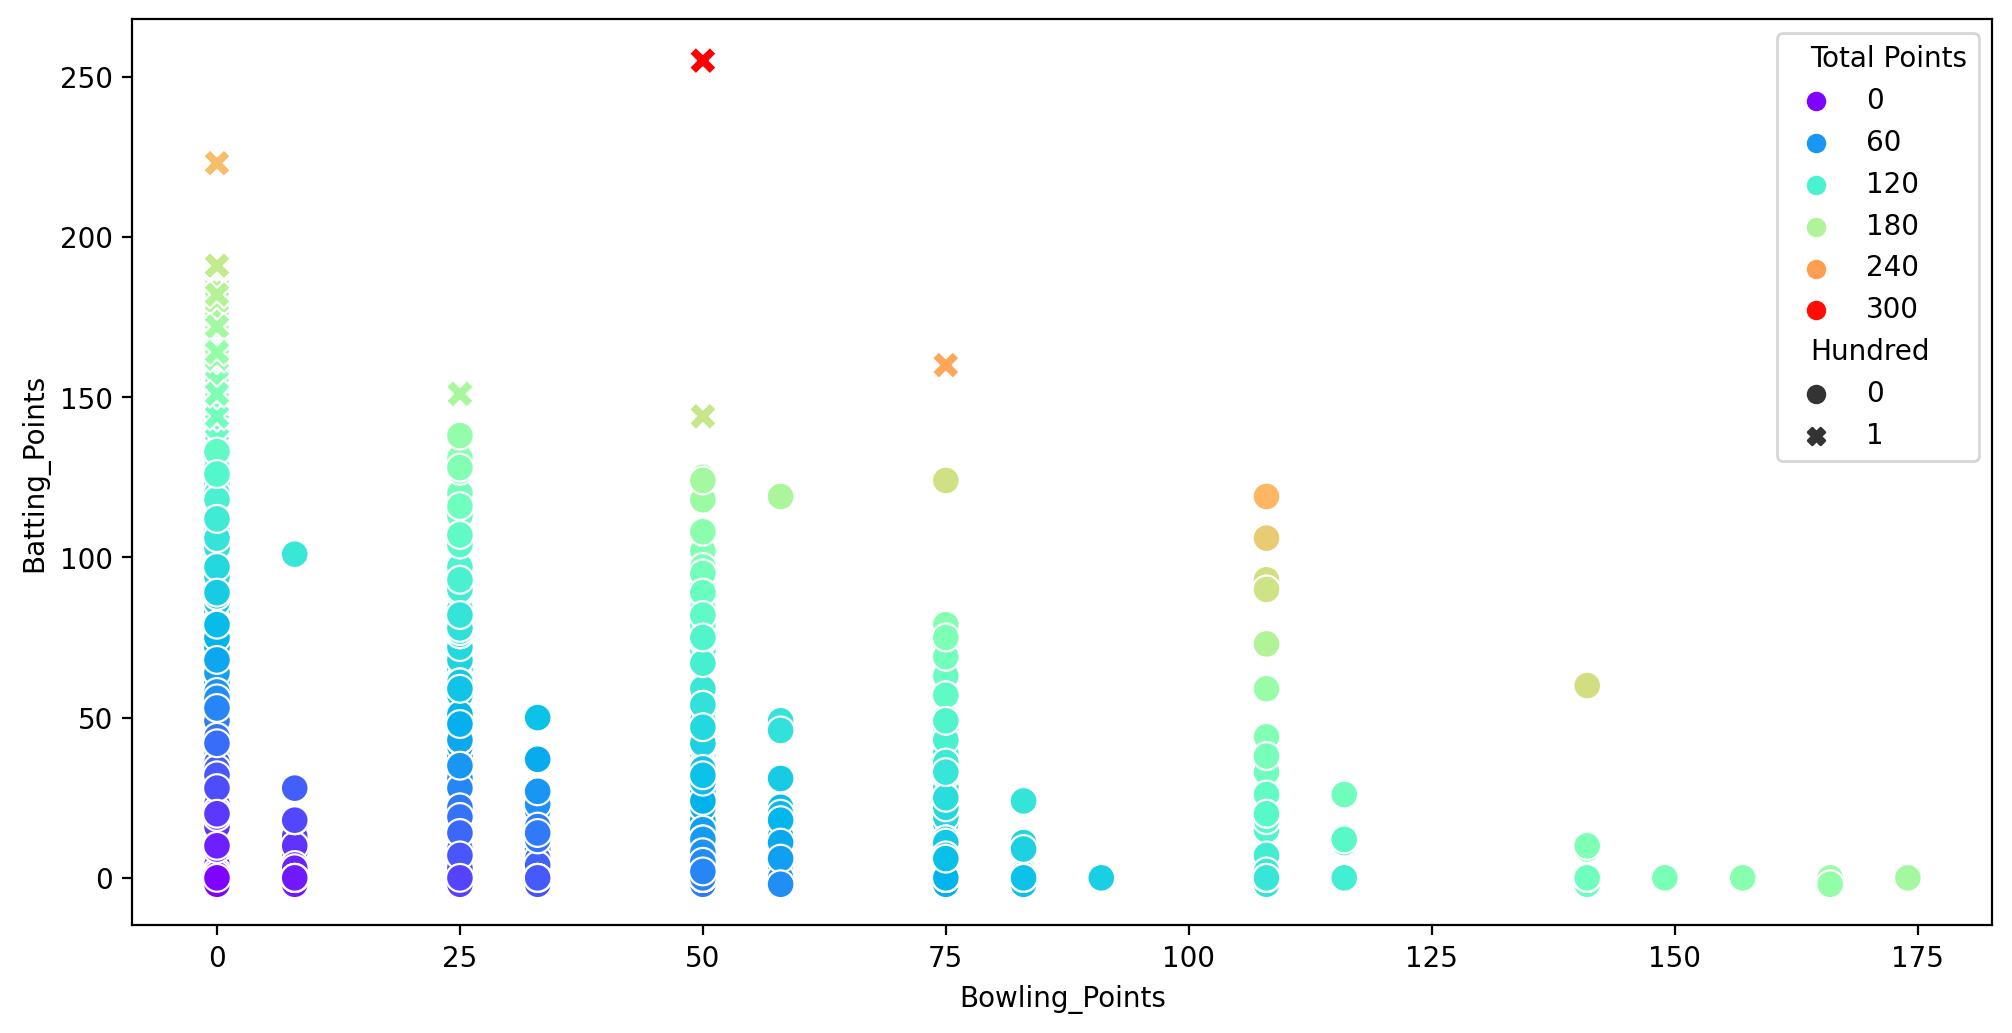

In [19]:
plt.figure(figsize=(12,6),dpi=200)

sns.scatterplot(y='Batting_Points',x='Bowling_Points',data=train_df,hue='Total Points',palette='rainbow',s=100,style='Hundred')


In [20]:
pre_matches.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


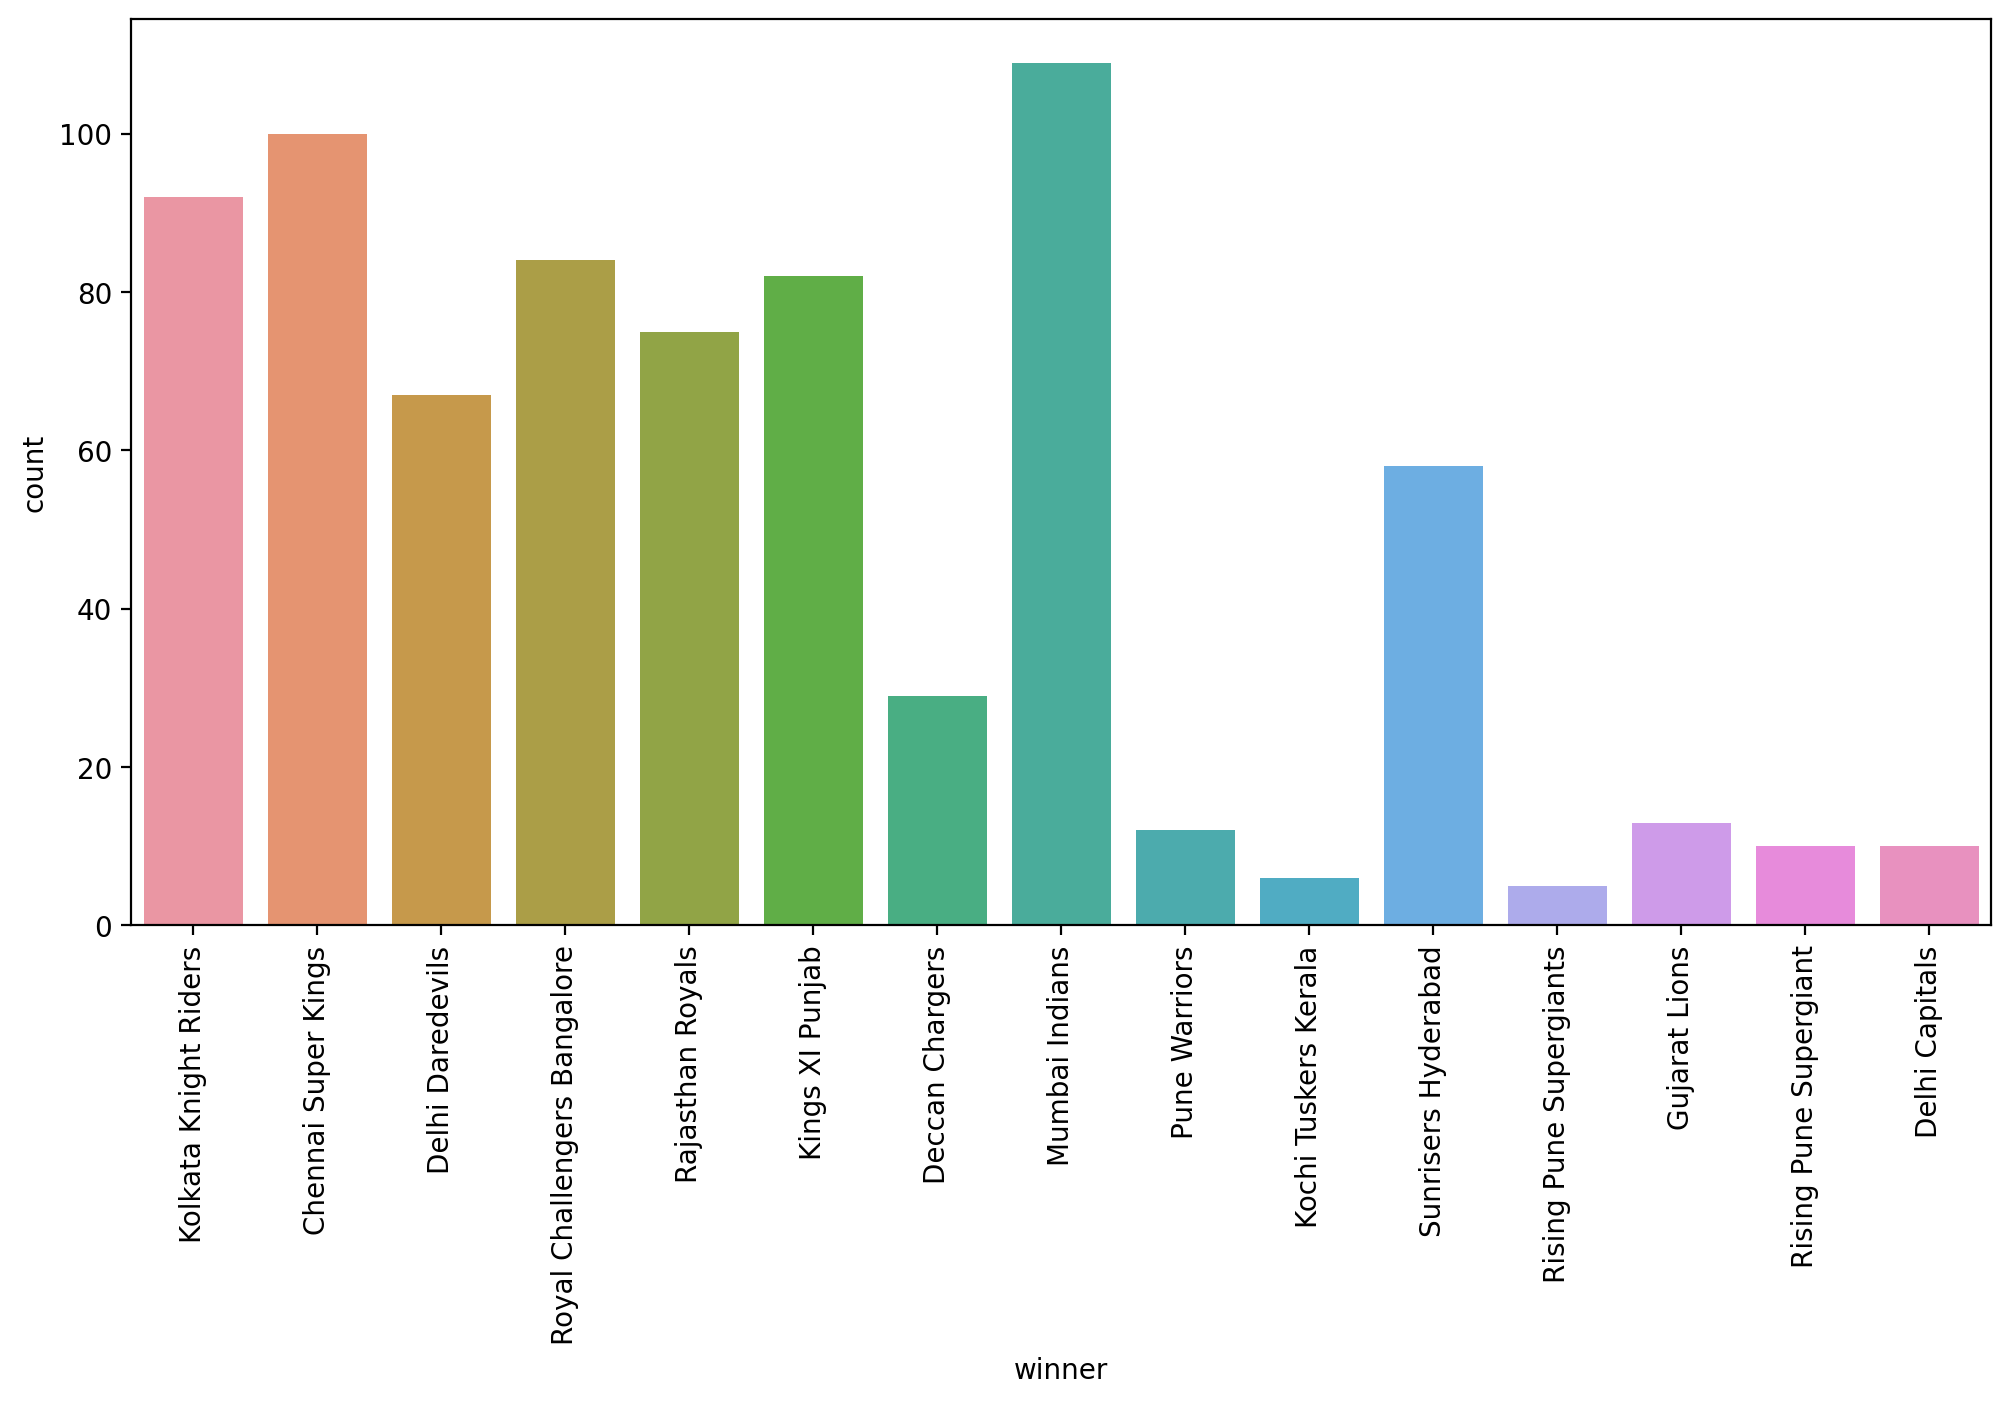

In [21]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(pre_matches.winner)
plt.xticks(rotation=90);

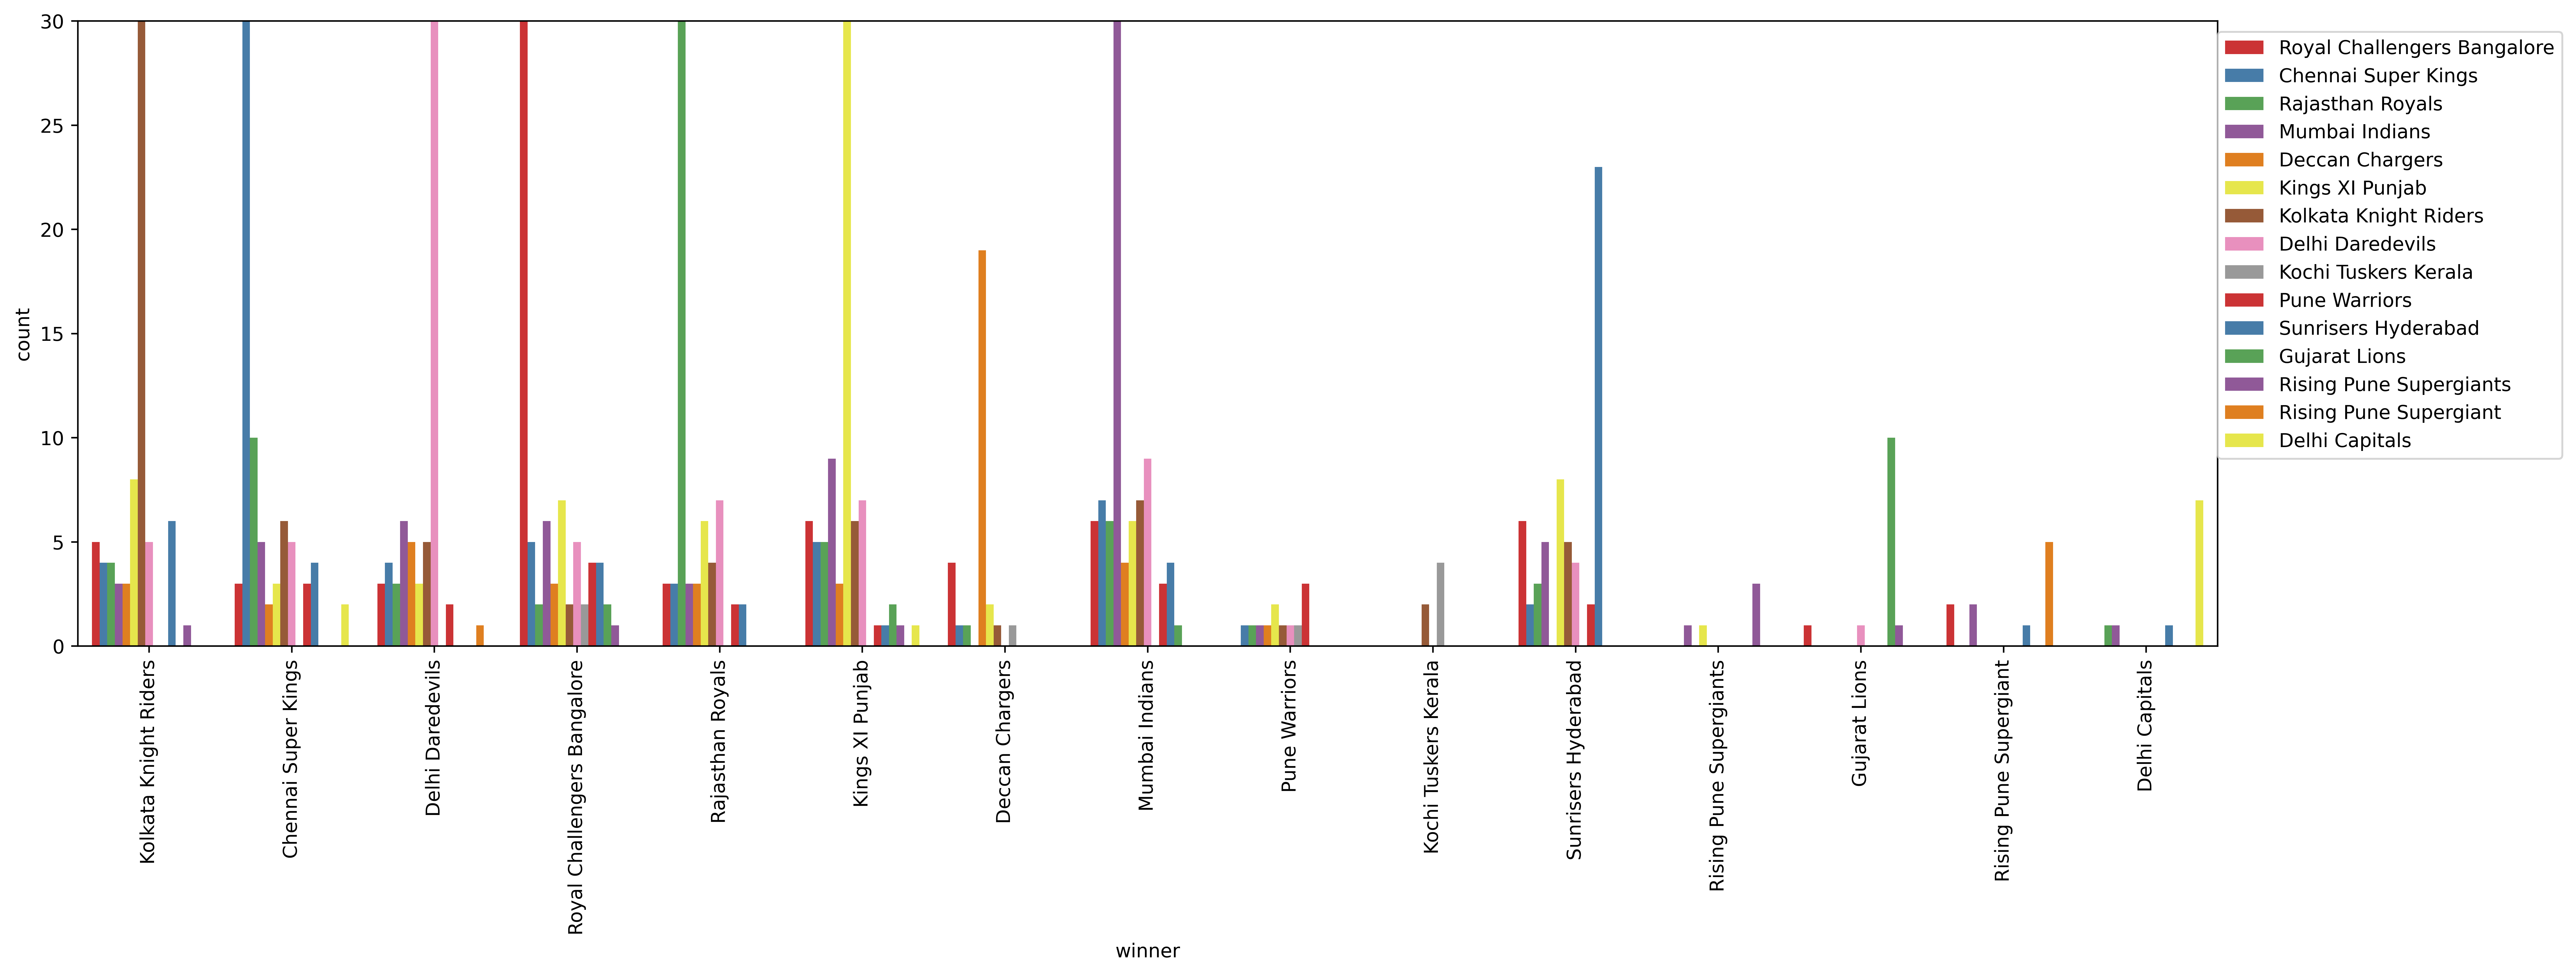

In [22]:
plt.figure(figsize=(20,6),dpi=500)
sns.countplot(data=pre_matches,x='winner',hue='toss_winner',palette='Set1')
plt.xticks(rotation=90)
plt.ylim(top=30)
plt.legend(loc=(1,0.3));

## Who win the toss and Who win match?

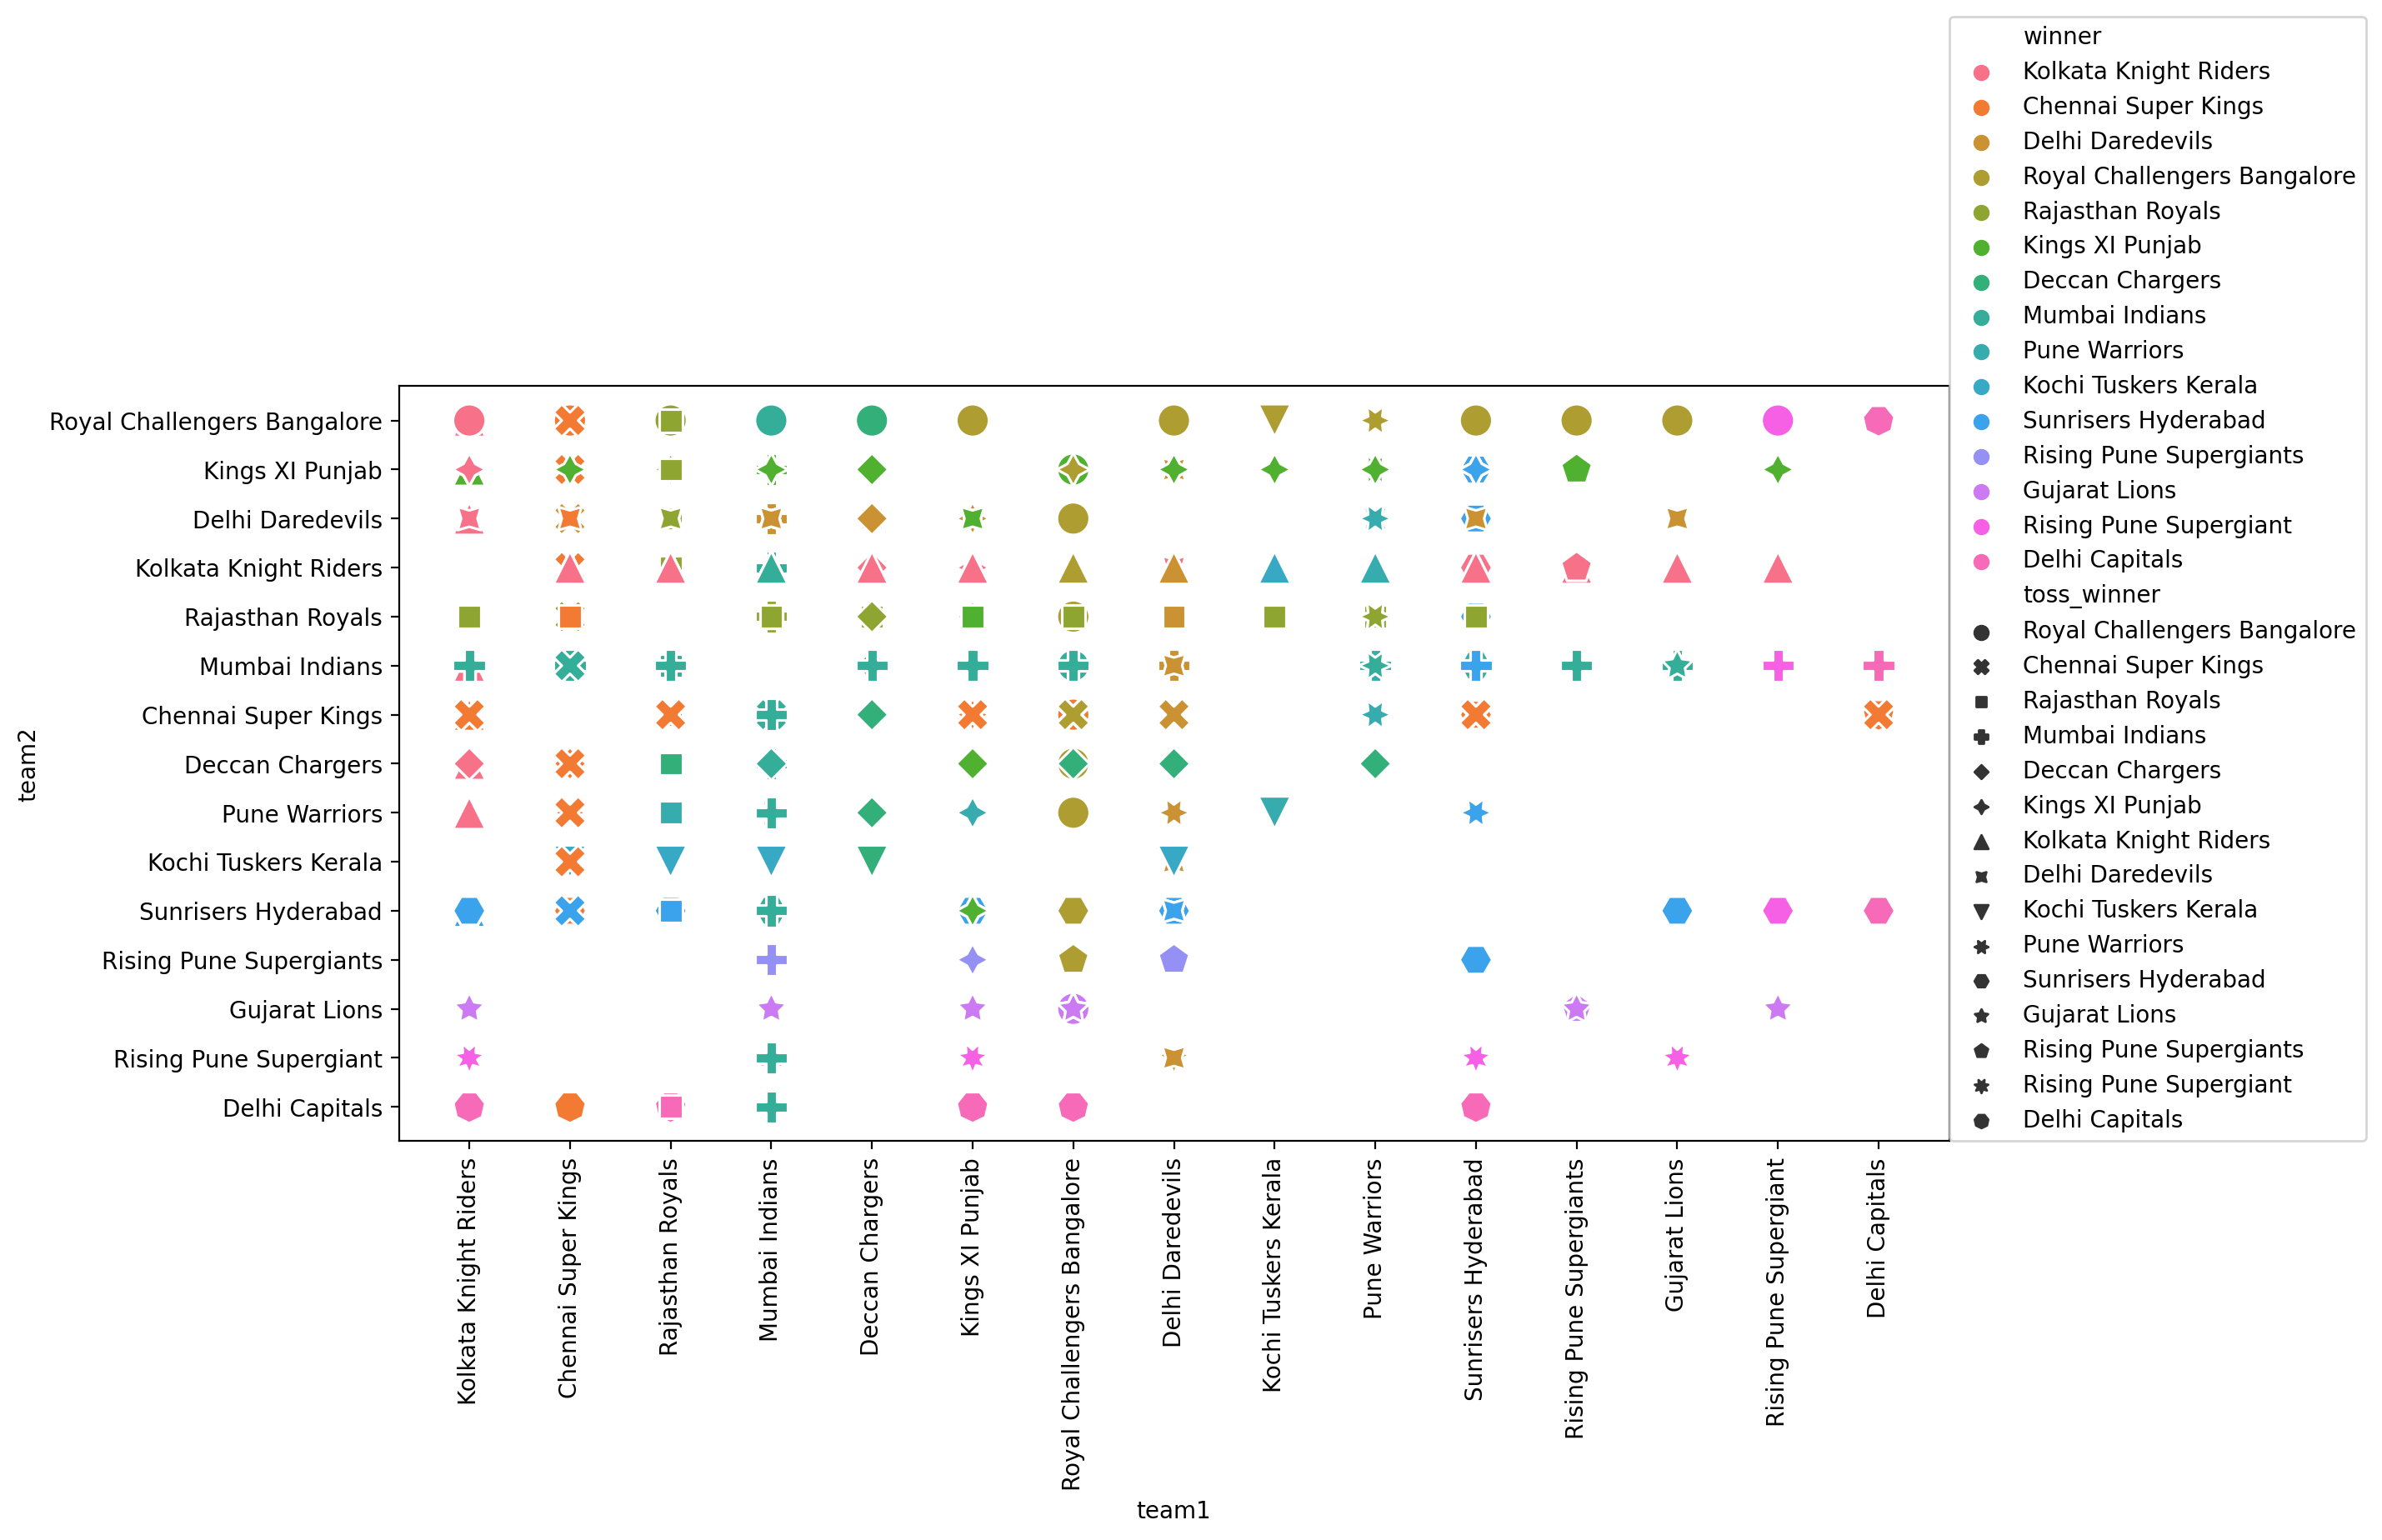

In [23]:

plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=pre_matches,x='team1',y='team2',hue='winner',s=200,style='toss_winner')

plt.xticks(rotation=90)
plt.legend(loc=(1,1), bbox_to_anchor=(1, 0));


In [24]:
matches_2020.head()

,match_id,city,date,team1,team2,venue,umpire1,umpire2,umpire3
0,1216492,Abu Dhabi,9/19/2020,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
1,1216493,Dubai (DSC),9/20/2020,DC,KXIP,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel
2,1216534,Dubai (DSC),9/21/2020,SRH,RCB,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary
3,1216496,Sharjah,9/22/2020,RR,CSK,Sharjah Cricket Stadium,Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan
4,1216508,Abu Dhabi,9/23/2020,KKR,MI,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='city', ylabel='count'>

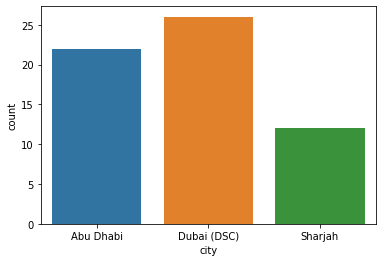

In [25]:
sns.countplot(matches_2020.city)

In [26]:
ndf = df.drop(['Id','match_number','season','team1','team2'],axis=1)
ndf.select_dtypes(include='object')
ndf.select_dtypes(exclude='object')
corr = pd.get_dummies(ndf[['player','team','total_score']]).corr()





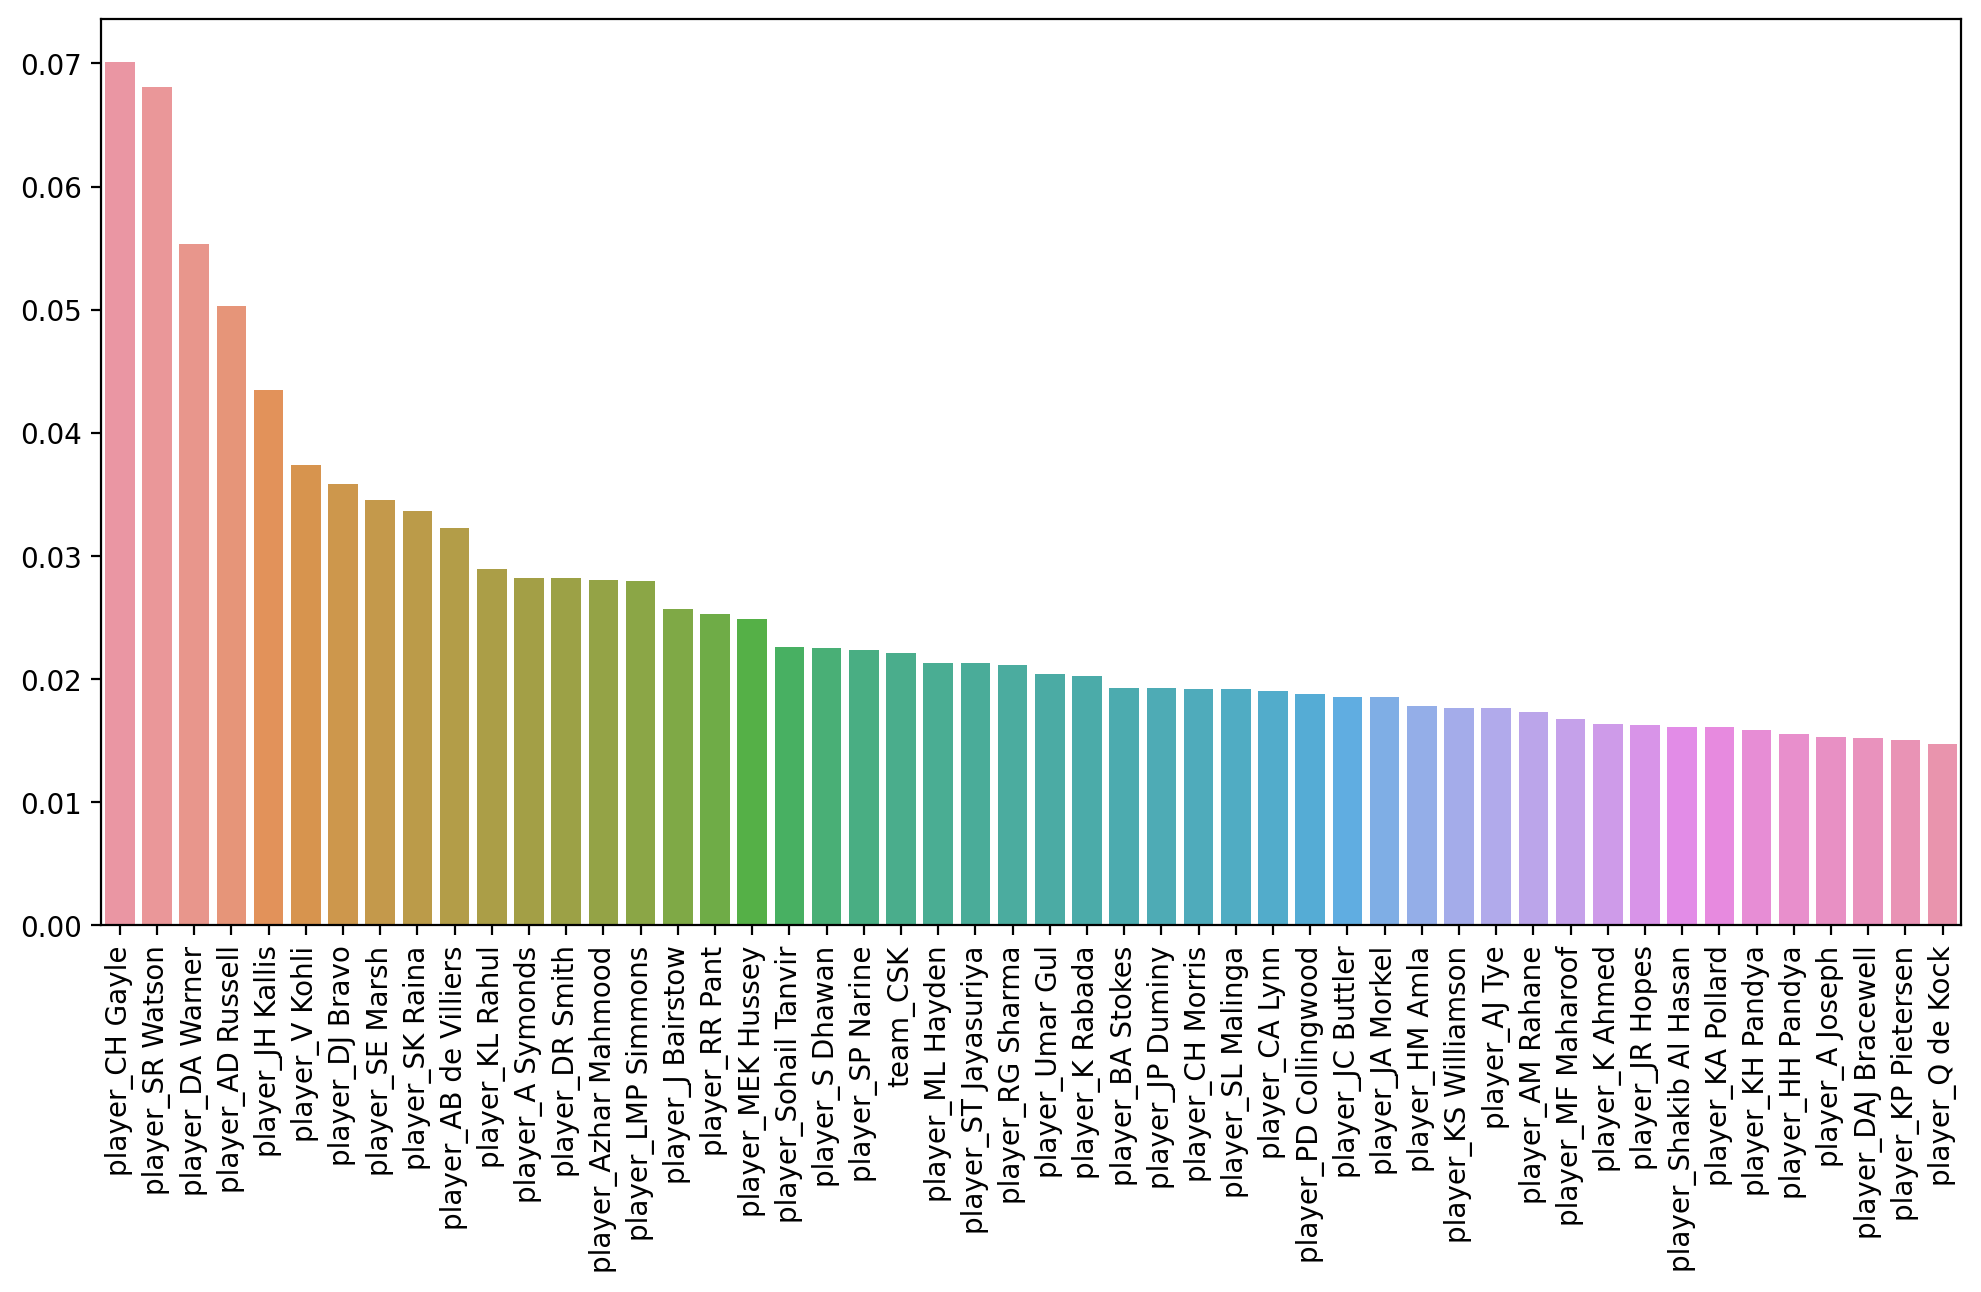

In [27]:
# expecting these feature will give more value to predictions
plt.figure(figsize=(12,6),dpi=200)
cor =corr['total_score'].sort_values(ascending=False).iloc[1:].head(50)
sns.barplot(x=cor.index,y=cor.values)
plt.xticks(rotation=90);


## data preprocessing

In [28]:
print("Skewness: %f" % df['total_score'].skew())
print("Kurtosis: %f" % df['total_score'].kurt())

Skewness: 1.452653
Kurtosis: 2.968407


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_score', ylabel='Density'>

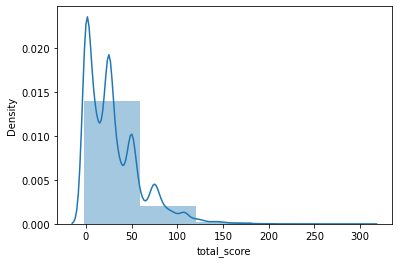

In [29]:
sns.distplot(df.total_score,bins=5)


main_df = df[df['player'].isin(player2)]
print(main_df.shape)
main_df.head()



In [30]:
df.shape

(15916, 8)

In [31]:
# outlier dealing ...
#df.total_score = [df.total_score.mode()[0] if i<90 else i for i in df.total_score]
df2 = df[df.total_score <80]
total_df = pd.concat([df2.drop('total_score',axis=1),submission.drop('Total Points',axis=1)],axis=0)

print(df2.shape)
print(total_df.shape)
total_df

(14795, 8)
(16078, 7)


,Id,player,match_number,season,team1,team2,team
0,1_Bipul Sharma,Bipul Sharma,1,2017,SRH,RCB,SRH
1,1_DJ Hooda,DJ Hooda,1,2017,SRH,RCB,SRH
2,1_KM Jadhav,KM Jadhav,1,2017,SRH,RCB,RCB
3,1_Mandeep Singh,Mandeep Singh,1,2017,SRH,RCB,RCB
5,1_STR Binny,STR Binny,1,2017,SRH,RCB,RCB
...,...,...,...,...,...,...,...
1278,1237181_S Hetmyer,S Hetmyer,1237181,2020,DC,MI,DC
1279,1237181_SA Yadav,SA Yadav,1237181,2020,DC,MI,MI
1280,1237181_SS Iyer,SS Iyer,1237181,2020,DC,MI,DC
1281,1237181_SS Tiwary,SS Tiwary,1237181,2020,DC,MI,MI


In [32]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.pipeline import make_pipeline ,Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.compose import make_column_transformer ,ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression


In [33]:
total_df =total_df.drop(['Id','season','match_number'],axis=1)

In [34]:
le =LabelEncoder()
total_df.player = le.fit_transform(total_df.player)
total_df.team1 = le.fit_transform(total_df.team1)
total_df.team2 = le.fit_transform(total_df.team2)
total_df.team = le.fit_transform(total_df.team)

In [35]:
#if you combine train and test set

X_train = total_df[:14795] 
Xf_test = total_df[14795:]
y = df2['total_score']


## Training my model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.1, random_state=42)

In [37]:

X_train.head()

,player,team1,team2,team
7151,447,5,0,0
4560,166,1,5,1
15318,15,5,9,5
183,45,1,8,8
3178,276,9,0,9


## make_pipeline :)

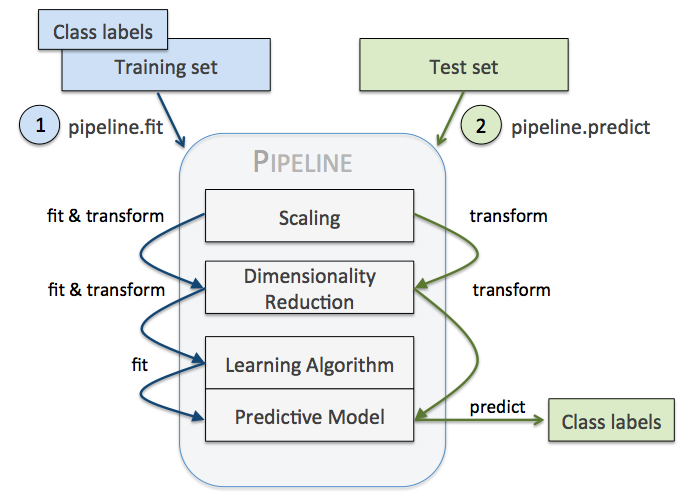

In [38]:
one = OneHotEncoder(handle_unknown='ignore')
scaler =StandardScaler()

fs = SelectKBest()
le =LabelEncoder()

In [39]:
total_df.select_dtypes(include='object').columns

Index([], dtype='object')

In [40]:

linear = LinearRegression()
random = RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1,max_features=4)
decision = DecisionTreeRegressor( criterion="friedman_mse", splitter= 'random')

In [41]:
from sklearn.ensemble import StackingRegressor

estimators = [
        ('RFC' ,RandomForestRegressor(n_estimators=11,criterion="friedman_mse", random_state = 42)),
        ('LR',  LinearRegression()),
        ('DTC', DecisionTreeRegressor()),
        ('SVC', AdaBoostRegressor()),
        
]

clf = StackingRegressor(
    estimators=estimators, 
    final_estimator= GradientBoostingRegressor()
)

In [42]:
import xgboost as xgb
xgb = xgb.XGBRegressor(max_depth=3, n_estimators=250, learning_rate=0.01,
                            n_jobs=-1,random_state=42,subsample=0.8)

In [43]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(tree_method='gpu_hist')

In [44]:
import optuna
def objective(trial):
    params = {
        'random_state': 0,
        'n_estimators': trial.suggest_categorical('n_estimators', [10000]),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 10),
        'subsample': trial.suggest_categorical('subsample', [0.8, 0.9, 1.0]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.1, 0.2, 0.3, 0.4, 0.5]),
        'tree_method':'gpu_hist'    # comment this line if GPU is off
    }
    model = xgb.XGBRegressor(**params) 
    model.fit(X_train, y_train, eval_set=[(X_test,y_test)], early_stopping_rounds=1000, verbose=0)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    return rmse

In [45]:
%%time
study = optuna.create_study(direction='minimize',sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100)
print('Number of finished trials:', len(study.trials))
print('Best parameters:', study.best_trial.params)
print('Best RMSE:', study.best_trial.value)

[I 2021-02-25 17:21:02,036] A new study created in memory with name: no-name-fc12cc09-2659-4788-a751-44397a5008b5
[I 2021-02-25 17:21:07,974] Trial 0 finished with value: 21.31155228864508 and parameters: {'n_estimators': 10000, 'max_depth': 7, 'learning_rate': 0.5932517736067933, 'reg_lambda': 8.442657485810173, 'reg_alpha': 8.579456176227568, 'gamma': 8.472517387841254, 'subsample': 0.9, 'colsample_bytree': 0.3}. Best is trial 0 with value: 21.31155228864508.
[I 2021-02-25 17:21:08,960] Trial 1 finished with value: 21.293746985516584 and parameters: {'n_estimators': 10000, 'max_depth': 7, 'learning_rate': 0.2982370719379278, 'reg_lambda': 0.5671297731744318, 'reg_alpha': 2.726562945801132, 'gamma': 4.776651173213499, 'subsample': 1.0, 'colsample_bytree': 0.1}. Best is trial 1 with value: 21.293746985516584.
[I 2021-02-25 17:21:11,878] Trial 2 finished with value: 21.283693240301773 and parameters: {'n_estimators': 10000, 'max_depth': 4, 'learning_rate': 0.9256710416543684, 'reg_lambd

Number of finished trials: 100
Best parameters: {'n_estimators': 10000, 'max_depth': 7, 'learning_rate': 0.9491995712385481, 'reg_lambda': 5.826736687293446, 'reg_alpha': 0.6539495334269679, 'gamma': 7.21004028592267, 'subsample': 0.8, 'colsample_bytree': 0.3}
Best RMSE: 21.228899186154038
CPU times: user 4min 18s, sys: 2.34 s, total: 4min 20s
Wall time: 4min 17s


In [46]:
optuna.visualization.plot_optimization_history(study)

In [47]:
params = study.best_params
params['random_state'] = 0
params['n_estimators'] = 10000
params['tree_method'] = 'gpu_hist'

model3 = xgb.XGBRegressor(**params)
model3.fit(X_train,y_train,eval_set=[(X_test, y_test)],early_stopping_rounds=1000,verbose=2)

[0]	validation_0-rmse:21.44393
[2]	validation_0-rmse:21.39731
[4]	validation_0-rmse:21.39497
[6]	validation_0-rmse:21.38523
[8]	validation_0-rmse:21.37107
[10]	validation_0-rmse:21.35729
[12]	validation_0-rmse:21.45594
[14]	validation_0-rmse:21.47543
[16]	validation_0-rmse:21.47364
[18]	validation_0-rmse:21.46477
[20]	validation_0-rmse:21.44711
[22]	validation_0-rmse:21.44755
[24]	validation_0-rmse:21.49117
[26]	validation_0-rmse:21.34498
[28]	validation_0-rmse:21.34698
[30]	validation_0-rmse:21.34446
[32]	validation_0-rmse:21.34511
[34]	validation_0-rmse:21.34552
[36]	validation_0-rmse:21.34436
[38]	validation_0-rmse:21.32457
[40]	validation_0-rmse:21.36076
[42]	validation_0-rmse:21.39299
[44]	validation_0-rmse:21.39795
[46]	validation_0-rmse:21.35816
[48]	validation_0-rmse:21.35329
[50]	validation_0-rmse:21.29894
[52]	validation_0-rmse:21.30756
[54]	validation_0-rmse:21.30539
[56]	validation_0-rmse:21.29305
[58]	validation_0-rmse:21.30230
[60]	validation_0-rmse:21.32737
[62]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=7.21004028592267,
             gpu_id=0, importance_type='gain', interaction_constraints='',
             learning_rate=0.9491995712385481, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0.6539495334269679, reg_lambda=5.826736687293446,
             scale_pos_weight=1, subsample=0.8, tree_method='gpu_hist',
             validate_parameters=1, verbosity=None)

In [48]:
#ct = make_column_transformer((le,['player','team']),remainder='passthrough')

In [49]:
model = make_pipeline(linear)
model.fit(X_train,y_train)
model2 = make_pipeline(random)
model2.fit(X_train,y_train)
model4 = make_pipeline(clf)
model4.fit(X_train,y_train)


Pipeline(steps=[('stackingregressor',
                 StackingRegressor(estimators=[('RFC',
                                                RandomForestRegressor(criterion='friedman_mse',
                                                                      n_estimators=11,
                                                                      random_state=42)),
                                               ('LR', LinearRegression()),
                                               ('DTC', DecisionTreeRegressor()),
                                               ('SVC', AdaBoostRegressor())],
                                   final_estimator=GradientBoostingRegressor()))])

model = make_pipeline(ct,linear)
model.fit(X_train,y_train)
model2 = make_pipeline(ct,random)
model2.fit(X_train,y_train)

model3 = make_pipeline(ct,decision)
model3.fit(X_train,y_train)
model4 = make_pipeline(ct,clf)
model4.fit(X_train,y_train)
model5 = make_pipeline(ct,xgb)
model5.fit(X_train,y_train)



In [50]:
import xgboost as xgb
model5 = xgbr
model5.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [51]:
models ={'linear':model}
models['random'] = model2
models['optuna xgbr'] = model3
models['stack']  = model4
models['xgbr'] = model5


## All in one plot

In [52]:
models.keys()

dict_keys(['linear', 'random', 'optuna xgbr', 'stack', 'xgbr'])

In [53]:
def rmse(y_test,y_pred):
    rmse= np.sqrt(mean_squared_error(y_test,y_pred))
    return rmse


In [54]:
from sklearn.model_selection import KFold
from sklearn.base import clone

def cross_val_rmse(model):
    model =clone(model)
    five_fold = KFold(n_splits=5)
    rmse_val =[]
    for tr_ind,val_ind in five_fold.split(X_train):
        model.fit(X_train.iloc[tr_ind,:],y.iloc[tr_ind])
        rmse_val.append(rmse(y.iloc[val_ind],model.predict(X_train.iloc[val_ind,:])))
        
    return np.mean(rmse_val)


In [55]:
models.keys()

dict_keys(['linear', 'random', 'optuna xgbr', 'stack', 'xgbr'])

In [56]:
import plotly.graph_objects as go

def compare_models(models):
    training_rmse = [rmse(y_train,model.predict(X_train)) for model in models.values()]
    validate_rmse = [cross_val_rmse(model) for model in models.values()] 
    testing_rmse = [rmse(y_test,model.predict(X_test)) for model in models.values()]
    names = list(models.keys())
    fig = go.Figure([
                      go.Bar(x=names ,y=training_rmse ,name='traing_rmse'),
                      go.Bar(x=names ,y=validate_rmse ,name='validate_rmse'),
                      go.Bar(x=names ,y=testing_rmse ,name='testing_rmse',opacity=.3)])
    return fig

In [57]:
fig = compare_models(models)
fig.update_yaxes(range=[2,40.1],title="RMSE")
fig.show()


In [58]:
y_pred = model3.predict(X_test)
y_pred =np.round(y_pred)
y_pred.tolist()

[25.0,
 21.0,
 25.0,
 22.0,
 27.0,
 19.0,
 32.0,
 25.0,
 21.0,
 27.0,
 19.0,
 28.0,
 31.0,
 19.0,
 27.0,
 27.0,
 25.0,
 23.0,
 20.0,
 34.0,
 18.0,
 21.0,
 28.0,
 28.0,
 21.0,
 27.0,
 22.0,
 26.0,
 33.0,
 28.0,
 27.0,
 30.0,
 21.0,
 23.0,
 17.0,
 25.0,
 21.0,
 27.0,
 31.0,
 25.0,
 21.0,
 18.0,
 24.0,
 27.0,
 27.0,
 21.0,
 25.0,
 21.0,
 21.0,
 23.0,
 26.0,
 18.0,
 29.0,
 25.0,
 26.0,
 25.0,
 25.0,
 18.0,
 29.0,
 20.0,
 27.0,
 27.0,
 24.0,
 28.0,
 21.0,
 21.0,
 27.0,
 17.0,
 29.0,
 26.0,
 28.0,
 22.0,
 26.0,
 32.0,
 20.0,
 17.0,
 32.0,
 23.0,
 24.0,
 32.0,
 21.0,
 24.0,
 22.0,
 30.0,
 26.0,
 28.0,
 24.0,
 29.0,
 25.0,
 22.0,
 21.0,
 24.0,
 14.0,
 13.0,
 26.0,
 23.0,
 22.0,
 24.0,
 25.0,
 22.0,
 27.0,
 24.0,
 27.0,
 17.0,
 22.0,
 28.0,
 21.0,
 31.0,
 19.0,
 17.0,
 20.0,
 25.0,
 35.0,
 25.0,
 19.0,
 27.0,
 25.0,
 33.0,
 30.0,
 24.0,
 24.0,
 20.0,
 28.0,
 21.0,
 26.0,
 25.0,
 31.0,
 17.0,
 30.0,
 25.0,
 22.0,
 22.0,
 25.0,
 29.0,
 19.0,
 23.0,
 25.0,
 23.0,
 21.0,
 24.0,
 26.0,
 27.0,
 26.0,

In [59]:
print('min',y_pred.min())
print('max',y_pred.max())
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE',RMSE)

min 11.0
max 37.0
RMSE 21.231701183257435


## Predictions for test set

In [60]:
ys_pred=model3.predict(Xf_test)
ys_pred = np.round(ys_pred)
print('min',ys_pred.min())
print('max',ys_pred.max())
print(ys_pred.tolist())

min 13.0
max 36.0
[28.0, 26.0, 25.0, 30.0, 25.0, 25.0, 16.0, 25.0, 30.0, 22.0, 26.0, 23.0, 28.0, 27.0, 28.0, 27.0, 25.0, 23.0, 21.0, 34.0, 23.0, 21.0, 29.0, 17.0, 17.0, 19.0, 29.0, 22.0, 29.0, 27.0, 25.0, 30.0, 22.0, 26.0, 26.0, 26.0, 21.0, 24.0, 22.0, 32.0, 27.0, 22.0, 27.0, 25.0, 28.0, 22.0, 29.0, 29.0, 25.0, 20.0, 18.0, 21.0, 26.0, 26.0, 22.0, 25.0, 21.0, 21.0, 25.0, 19.0, 23.0, 27.0, 17.0, 29.0, 23.0, 26.0, 30.0, 19.0, 24.0, 27.0, 16.0, 19.0, 25.0, 28.0, 28.0, 25.0, 22.0, 31.0, 18.0, 13.0, 23.0, 27.0, 18.0, 23.0, 24.0, 30.0, 30.0, 25.0, 16.0, 22.0, 26.0, 28.0, 27.0, 28.0, 23.0, 27.0, 26.0, 21.0, 23.0, 29.0, 33.0, 23.0, 17.0, 17.0, 26.0, 18.0, 30.0, 29.0, 27.0, 20.0, 32.0, 28.0, 27.0, 25.0, 23.0, 27.0, 22.0, 25.0, 20.0, 25.0, 24.0, 24.0, 28.0, 24.0, 32.0, 27.0, 28.0, 19.0, 20.0, 28.0, 20.0, 32.0, 19.0, 23.0, 30.0, 21.0, 25.0, 31.0, 24.0, 25.0, 21.0, 26.0, 26.0, 21.0, 33.0, 32.0, 29.0, 19.0, 24.0, 27.0, 30.0, 29.0, 26.0, 28.0, 19.0, 26.0, 30.0, 27.0, 18.0, 27.0, 32.0, 26.0, 20.0, 30.

## Submitting Prediction

In [61]:
submission.head()

,Id,Total Points,player,match_number,season,team1,team2,team
0,1216492_AS Yadav,0,AS Yadav,1216492,2020,MI,CSK,MI
1,1216492_AT Rayudu,0,AT Rayudu,1216492,2020,MI,CSK,CSK
2,1216492_DL Chahar,0,DL Chahar,1216492,2020,MI,CSK,CSK
3,1216492_F du Plessis,0,F du Plessis,1216492,2020,MI,CSK,CSK
4,1216492_HH Pandya,0,HH Pandya,1216492,2020,MI,CSK,MI


In [62]:
submission['Total Points'] = ys_pred
subb = submission.drop(['player','team1','team2','match_number','season','team'],axis=1)
subb.head()

,Id,Total Points
0,1216492_AS Yadav,28.0
1,1216492_AT Rayudu,26.0
2,1216492_DL Chahar,25.0
3,1216492_F du Plessis,30.0
4,1216492_HH Pandya,25.0


In [63]:
subb.to_csv('predict11_11.csv',index=False)

## Good to see You Referring :)
                          
                         
                          
                          
                          
                          
                          
                          
                          

## if u like Upvote :)